<a href="https://colab.research.google.com/github/ethanmjansen/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS10_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



#Problem 1)

In [0]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [0]:
def prob_drunk_given_positive(prob_drunk_prior,
                              false_positive_rate,
                              true_positive_rate, iteration):
  
  prob_not_drunk = 1 - prob_drunk_prior

  posterior_probability = (true_positive_rate*prob_drunk_prior)/((true_positive_rate*prob_drunk_prior) + (false_positive_rate*prob_not_drunk))

  for _ in range(0, iteration):
    if iteration > 1:
      posterior_probability = (true_positive_rate*prob_drunk_prior)/((true_positive_rate*prob_drunk_prior) + (false_positive_rate*prob_not_drunk))
      prob_drunk_prior = posterior_probability
      prob_not_drunk = 1 - prob_drunk_prior

  return(posterior_probability)


In [27]:
# Probability after one test

prob_drunk_given_positive(0.001, 0.08, 1, 1)

0.012357884330202669

In [28]:
# After two tests
prob_drunk_given_positive(0.001, 0.08, 1, 2)

0.13525210993291495

In [29]:
# Tests until you get above 95%
prob_drunk_given_positive(0.001, 0.08, 1, 4)

0.9606895076105054

#Problem 2)

In [30]:
# Read in Iris Dataset 

new_column_headers = ['sepal length in cm',
                      'sepal width in cm',
                      'petal length in cm',
                      'petal width in cm',
                      'class']

new_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None, names = new_column_headers)

new_df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
mean1, var1, std1 = stats.bayes_mvs(new_df['sepal length in cm'], .9) 
print('mean', mean1)
print('var', var1)
print('std', std1)


mean Mean(statistic=5.843333333333334, minmax=(5.731426832856519, 5.955239833810149))
var Variance(statistic=0.6950226757369615, minmax=(0.5724185865169326, 0.8389096949586926))
std Std_dev(statistic=0.8322635923150535, minmax=(0.7565834960643356, 0.9159201356879827))


In [41]:
mean2, var2, std2 = stats.bayes_mvs(new_df['sepal width in cm'], .9) 
print('mean', mean2)
print('var', var2)
print('std', std2)


mean Mean(statistic=3.0540000000000003, minmax=(2.9954032039570486, 3.112596796042952))
var Variance(statistic=0.19056190476190477, minmax=(0.15694621193779112, 0.2300129693251321))
std Std_dev(statistic=0.43579219942601205, minmax=(0.39616437489732864, 0.47959667359681735))


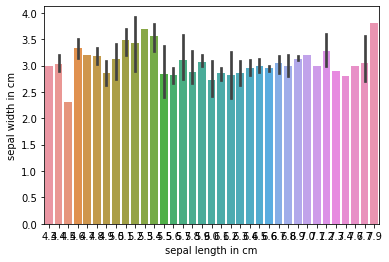

In [45]:
sns.barplot(new_df['sepal length in cm'], new_df['sepal width in cm'])

#Problem 3) The Difference between Bayesian and Frequentist Statistics 

The biggest difference between Bayesian and Frequentist Statistics is in how the they deal with probability. A Bayesian approach would be to model their probability based on a subjective assumption that is constantly updated. A Frequentist approach would be to model the probability after a sample is taken, no subjective thoughts, no updated model. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!